<a href="https://colab.research.google.com/github/realyou0312/DeepLearning/blob/main/Kaggle_ARIMA_Wolrd_War.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda/?select=Weather+Station+Locations.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings            
warnings.filterwarnings("ignore")
plt.style.use('ggplot') 

In [ ]:
aerial = pd.read_csv("/content/drive/MyDrive/TimeSeries/Aerial Bombing Operations in World War II/operations.csv")
weather_station_location = pd.read_csv("/content/drive/MyDrive/TimeSeries/Aerial Bombing Operations in World War II/Weather Station Locations.csv")
weather = pd.read_csv("/content/drive/MyDrive/TimeSeries/Aerial Bombing Operations in World War II/Summary of Weather.csv")

##Data Cleaning

In [ ]:
aerial.dropna(subset=['Country'], inplace=True)

aerial.dropna(subset=['Target Longitude'], inplace=True)

aerial.dropna(subset=['Takeoff Longitude'], inplace=True)

drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(columns=drop_list, inplace=True)

aerial = aerial[ aerial.iloc[:,8]!="4248"]
aerial = aerial[ aerial.iloc[:,9]!=1355]  

In [ ]:
weather_station_location = weather_station_location[["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"]]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [ ]:
weather = weather[["STA","Date","MeanTemp"]]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


## Data Visualization

In [ ]:
aerial['Country'].value_counts()

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64

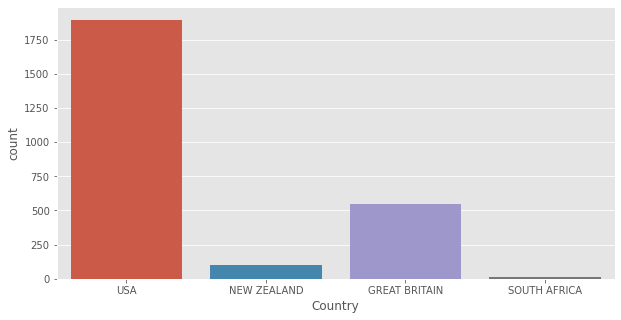

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(aerial['Country']);

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


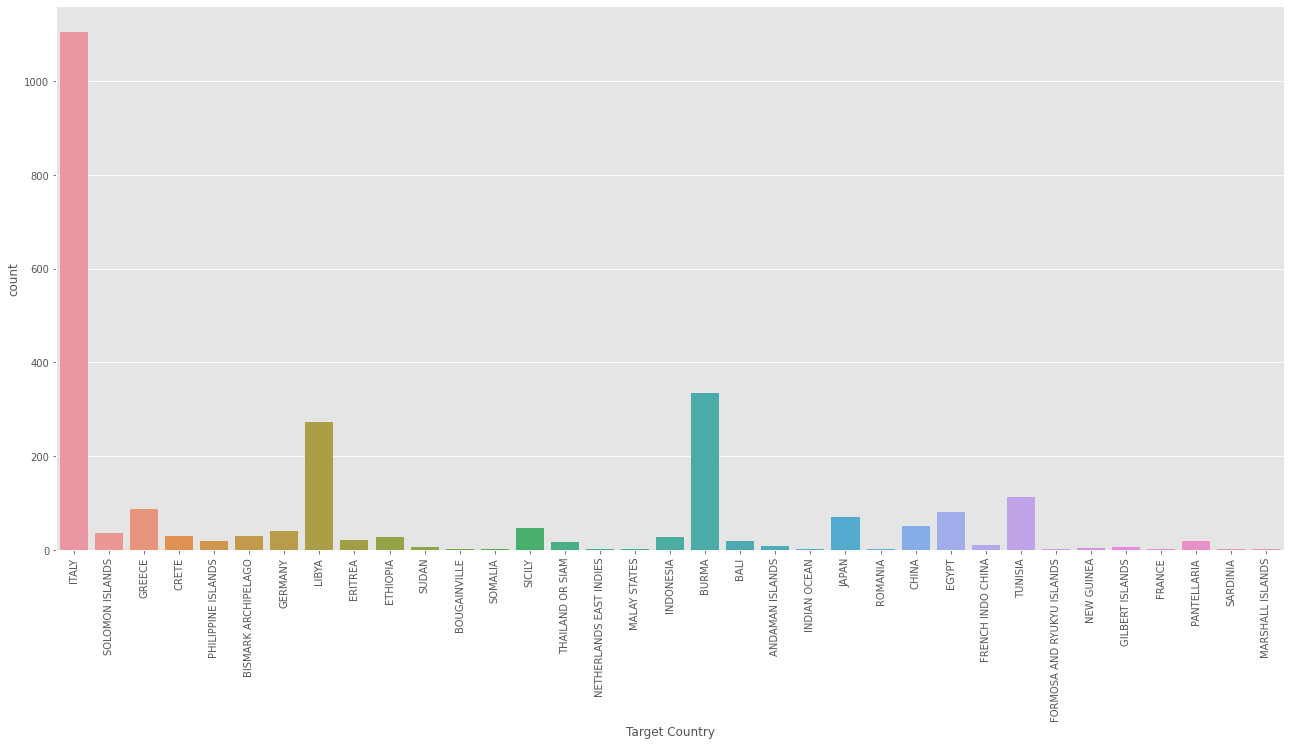

In [ ]:
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

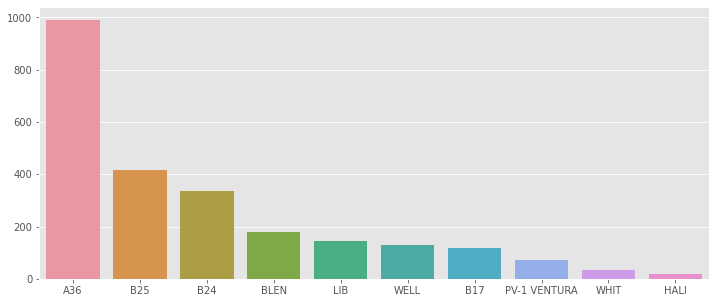

In [ ]:
data = aerial['Aircraft Series'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(data[:10].index, data[:10].values)

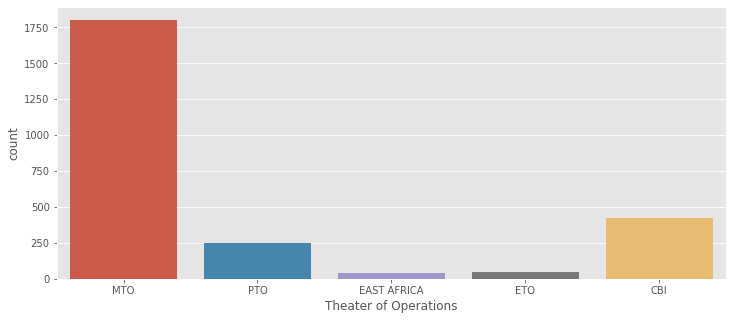

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(aerial['Theater of Operations']);

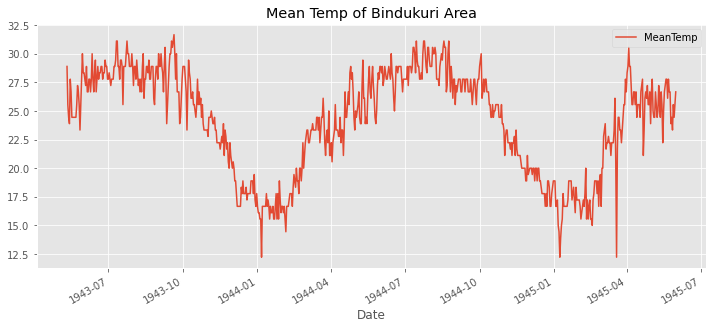

In [ ]:
bindu = weather_station_location[weather_station_location['NAME'] == 'BINDUKURI']
weather.Date = weather.Date.astype('datetime64')
bindu_weather = weather[weather['STA'] == int(bindu['WBAN'])]
bindu_weather.set_index('Date', inplace=True)
bindu_weather['MeanTemp'].plot(title='Mean Temp of Bindukuri Area', legend=True, figsize=(12,5))

In [ ]:
aerial = pd.read_csv("/content/drive/MyDrive/TimeSeries/Aerial Bombing Operations in World War II/operations.csv")
aerial['Mission Date'] = aerial['Mission Date'].astype('datetime64')
aerial['year'] = aerial['Mission Date'].astype('datetime64').apply(lambda x:x.year)
aerial['month'] = aerial['Mission Date'].astype('datetime64').apply(lambda x:x.month)
aerial = aerial[(aerial['year'] >= 1943) & (aerial['month']>= 8) ]

In [ ]:
attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

In [ ]:
bindu_weather.reset_index(inplace=True)
aerial_war.rename(columns={'Mission Date':'Date'}, inplace=True)
joined = bindu_weather.merge(aerial_war[['Date']], on='Date').drop_duplicates()

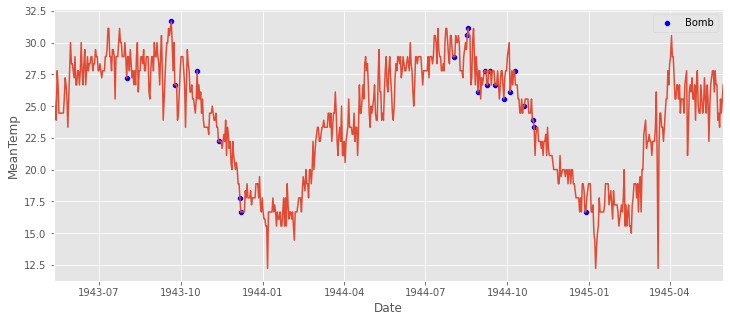

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Date', y='MeanTemp',color='blue', data=joined[['Date', 'MeanTemp']], label='Bomb').set(xlim=(bindu_weather.Date.iloc[0], bindu_weather.Date.iloc[-1]))
sns.lineplot(x='Date', y='MeanTemp',data=bindu_weather)

## 계절성 확인

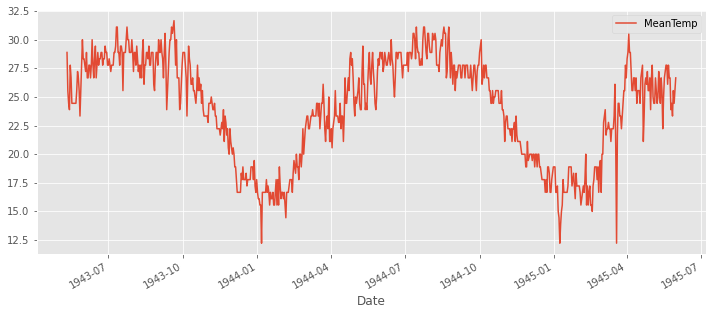

In [ ]:
bindu_weather.set_index('Date')['MeanTemp'].plot(figsize=(12,5));
plt.legend();

## Stationary

In [ ]:
ts = bindu_weather.set_index('Date')['MeanTemp']

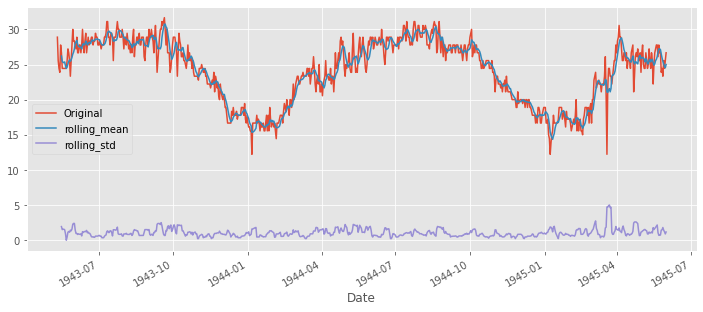

In [ ]:
plt.figure(figsize=(12,5))
ts.plot(label='Original', legend=True)
ts.rolling(6).mean().plot(legend=True, label='rolling_mean')
ts.rolling(6).std().plot(legend=True, label='rolling_std')

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts, autolag='AIC')
print('Test statistic: ' , result[0])
print('p-value: '  ,result[1])
print('Critical Values:' ,result[4])

Test statistic:  -1.4095966745887756
p-value:  0.5776668028526357
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


stationay의 첫번째 기준은 일정한 평균이다. 평균이 일정하지 않기 때문에 stationary하지 않다.

일정한 분산을 가지기 때문에 stationary하다.

시험 통계량이 주요 값보다 작지 않기에 stationary하지 않다.

계절성이 없는 2가지 근거

경향 : 시간에 따라 다른 평균값. 시계열에서 일정한 평균은 stationary의 근거이다.

계절성 : 특정 시간의 분산. 시계열에서 일정한 분산은 stationary의 근거이다.

trend(constant mean) 문제를 해결하기 위해 moving average 방법을 사용한다. 이전 ‘n’개의 윈도우 샘플의 평균으로 구한다.

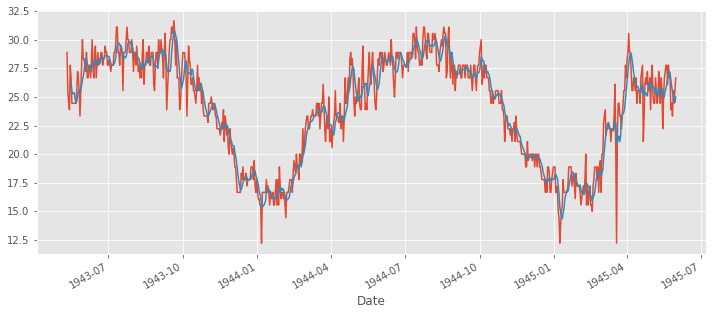

In [ ]:
ts.plot()
ts.rolling(6).mean().plot(figsize=(12,5))

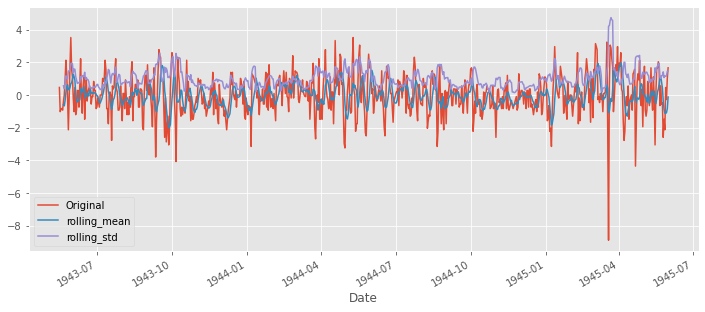

In [ ]:
ts_moving_avg_diff = ts - ts.rolling(6).mean()
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

plt.figure(figsize=(12,5))
ts_moving_avg_diff.plot(label='Original', legend=True)
ts_moving_avg_diff.rolling(6).mean().plot(legend=True, label='rolling_mean')
ts_moving_avg_diff.rolling(6).std().plot(legend=True, label='rolling_std')

In [ ]:
result = adfuller(ts_moving_avg_diff, autolag='AIC')
print('Test statistic: ' , result[0])
print('p-value: '  ,result[1])
print('Critical Values:' ,result[4])

Test statistic:  -11.138514335138469
p-value:  3.150868563164674e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


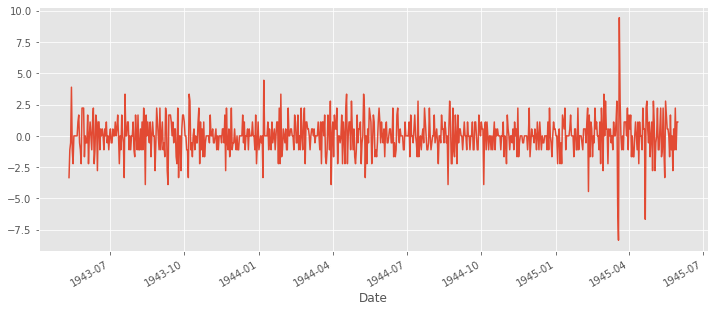

In [ ]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(12,5))
ts_diff.plot()

Test statistic:  -11.678955575105388
p-value:  1.7602075693557824e-21
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


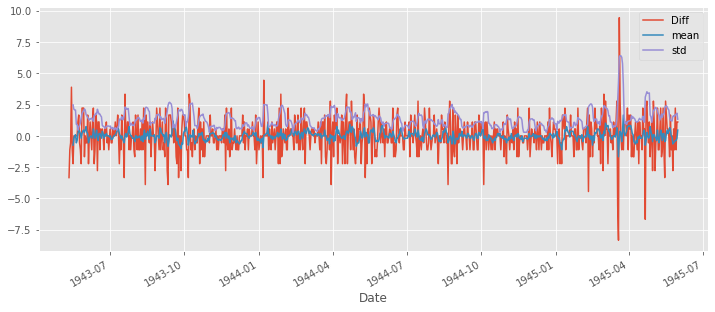

In [ ]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
plt.figure(figsize=(12,5))
ts_diff.plot(label='Diff', legend=True)
ts_diff.rolling(6).mean().plot(legend=True, label='mean')
ts_diff.rolling(6).std().plot(legend=True, label='std')


result = adfuller(ts_diff, autolag='AIC')
print('Test statistic: ' , result[0])
print('p-value: '  ,result[1])
print('Critical Values:' ,result[4])

## ARIMA Modeling

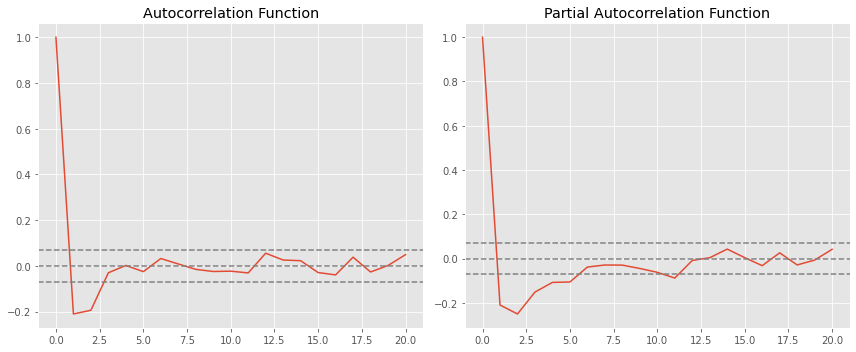

In [ ]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(12,5))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Choosing p: PACF차트가 위의 신뢰구간을 가로지를 때의 lag 값. p=1

Choosing q: ACF차트가 위의 신뢰구간을 가로지를 때의 lag 값. q=1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


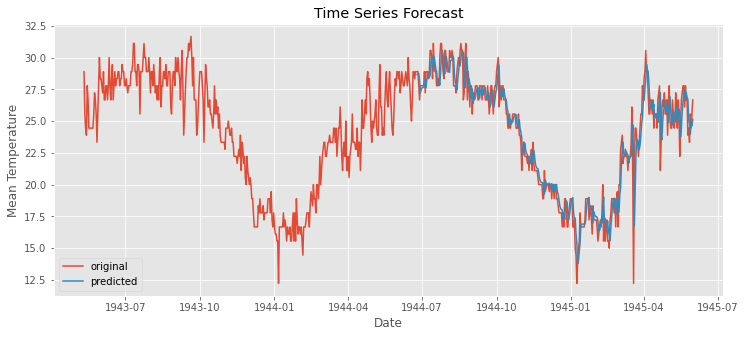

In [ ]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(1,0,1))
model_fit = model.fit(disp=0)

# predict
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(12,5))
plt.plot(bindu_weather.Date,bindu_weather.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


error:  1.8625819938201231


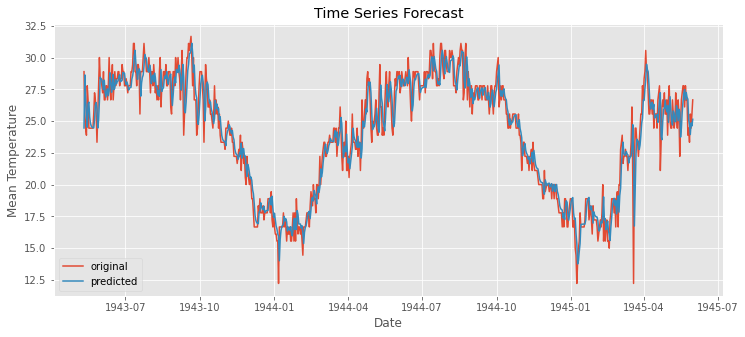

In [ ]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(12,5))
plt.plot(bindu_weather.Date,bindu_weather.MeanTemp,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()